# L-channel PDS
## Analysis of experiment #2 

TIMEOUT = 900 (seconds)</br>
NRUNS = 5</br>
ALL-Z = True (all vertices can propagate)</br>

## Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
import functools
from math import ceil, isnan
import numpy as np

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read stats

In [2]:
# Read .csv (the output of stats1.py)
filename = "stats2.csv"
timeout = 900000000 # 900000000 microseconds = 900 seconds = 15 minutes
df = pd.read_csv(filename, index_col=0)

Clean the data.

In [3]:
# Change column name "omega" to "L"
df = df.rename(columns={"omega": "L"})

# Rearrange L to start from 0
df.L = df.L - 1

# Handle instances where no solution was found
df.loc[df.upper_bound == -1.0, "upper_bound"] = float("nan")
df.loc[df.gap == 100.0, "gap"] = float("nan")

# Handle instance with timeout
df.loc[df.result == "Timeout", "t_solver"] = timeout

# Clean instance names
df.instance = df.instance.apply(lambda x: x.split("/")[-1])
df.instance = df.instance.apply(lambda x: x.split(".")[0])

# Transform microseconds to seconds
timeout = int(900000000 / 1000000)
df.t_solver = df.t_solver / 1000000
df.t_callback = df.t_callback / 1000000

# Sort values
df = df.sort_values(["vertices", "solver", "L", "run"], ignore_index=True)
df

,solver,instance,vertices,edges,propagating_vertices,L,variables,constraints,run,lower_bound,upper_bound,gap,result,nodes,t_solver,callbacks,t_callback,lazy_constraints
0,brimkov,case4gs,4,4,4,0,24,24,0,2.0,2.0,0.000000,Optimal,1,0.003829,0,0.0,0
1,brimkov,case4gs,4,4,4,0,24,24,1,2.0,2.0,0.000000,Optimal,1,0.002147,0,0.0,0
2,brimkov,case4gs,4,4,4,0,24,24,2,2.0,2.0,0.000000,Optimal,1,0.001735,0,0.0,0
3,brimkov,case4gs,4,4,4,0,24,24,3,2.0,2.0,0.000000,Optimal,1,0.001599,0,0.0,0
4,brimkov,case4gs,4,4,4,0,24,24,4,2.0,2.0,0.000000,Optimal,1,0.001564,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,jovanovic,case_Texas,2000,2667,2000,16,14668,40488,0,122.0,148.0,0.175676,Timeout,29903,900.000000,0,0.0,0
3466,jovanovic,case_Texas,2000,2667,2000,16,14668,40488,1,122.0,148.0,0.175676,Timeout,29903,900.000000,0,0.0,0
3467,jovanovic,case_Texas,2000,2667,2000,16,14668,40488,2,122.0,148.0,0.175676,Timeout,29905,900.000000,0,0.0,0
3468,jovanovic,case_Texas,2000,2667,2000,16,14668,40488,3,122.0,148.0,0.175676,Timeout,29901,900.000000,0,0.0,0


## Check solutions

In [4]:
def opt_val(serie):
    if serie.result == "Optimal":
        return serie.upper_bound
    else:
        return float("nan")

df["opt_val"] = df[["result", "upper_bound"]].apply(opt_val, axis=1)
df

,solver,instance,vertices,edges,propagating_vertices,L,variables,constraints,run,lower_bound,upper_bound,gap,result,nodes,t_solver,callbacks,t_callback,lazy_constraints,opt_val
0,brimkov,case4gs,4,4,4,0,24,24,0,2.0,2.0,0.000000,Optimal,1,0.003829,0,0.0,0,2.0
1,brimkov,case4gs,4,4,4,0,24,24,1,2.0,2.0,0.000000,Optimal,1,0.002147,0,0.0,0,2.0
2,brimkov,case4gs,4,4,4,0,24,24,2,2.0,2.0,0.000000,Optimal,1,0.001735,0,0.0,0,2.0
3,brimkov,case4gs,4,4,4,0,24,24,3,2.0,2.0,0.000000,Optimal,1,0.001599,0,0.0,0,2.0
4,brimkov,case4gs,4,4,4,0,24,24,4,2.0,2.0,0.000000,Optimal,1,0.001564,0,0.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465,jovanovic,case_Texas,2000,2667,2000,16,14668,40488,0,122.0,148.0,0.175676,Timeout,29903,900.000000,0,0.0,0,NaN
3466,jovanovic,case_Texas,2000,2667,2000,16,14668,40488,1,122.0,148.0,0.175676,Timeout,29903,900.000000,0,0.0,0,NaN
3467,jovanovic,case_Texas,2000,2667,2000,16,14668,40488,2,122.0,148.0,0.175676,Timeout,29905,900.000000,0,0.0,0,NaN
3468,jovanovic,case_Texas,2000,2667,2000,16,14668,40488,3,122.0,148.0,0.175676,Timeout,29901,900.000000,0,0.0,0,NaN


In [5]:
for instance in df.instance.unique():
    df1 = df[df.instance == instance]
    for l in df1.L.unique():
        df2 = df1[df1.L == l]
        lb = df2.lower_bound.max()
        ub = df2.upper_bound.min()
        if (isnan(df2.opt_val.min())):
            # Check lower and upper bounds
            assert(lb <= ub)            
        else:
            #print(instance, omega, df2.opt_val.min(), df2.opt_val.max())
            assert(df2.opt_val.min() == df2.opt_val.max())
            val = df2.opt_val.max()
            # Check lower and upper bounds
            assert(lb <= val)
            assert(val <= ub)
print("Checked :)")

Checked :)


## Compute $L^*$

$L^*$ is the minumum $L$ such that the optimal value of $L$-channel PDS is equal to the optimal value of PDS.

In [6]:
df4 = df.sort_values(["vertices", "instance", "opt_val", "L"], ignore_index=True).groupby("instance").head(1)
L_star = dict(zip(df4.instance, df4.L))
print(L_star)

{'case4gs': 1, 'case5': 1, 'case6ww': 3, 'case9': 2, 'case11_iwamoto': 2, 'case14': 1, 'case24_ieee_rts': 1, 'case_GBreduced29': 3, 'case30': 2, 'case_ieee30': 2, 'case33bw': 2, 'case39': 2, 'case57': 3, 'case96rts': 3, 'case89pegase': 7, 'case118': 4, 'case145': 6, 'case_iceland118': 6, 'case_illinois200': 7, 'case300': 7, 'case_south_carolina500': 9, 'case1354pegase': 7, 'case1888rte': 8, 'case1951rte': 11, 'case_Texas': 0}


Remove instances with $L$ greater than $L^*$.

In [7]:
df["L_star"] = df["instance"].apply(lambda x: L_star[x])
df = df[df.L <= df.L_star]
df

,solver,instance,vertices,edges,propagating_vertices,L,variables,constraints,run,lower_bound,upper_bound,gap,result,nodes,t_solver,callbacks,t_callback,lazy_constraints,opt_val,L_star
0,brimkov,case4gs,4,4,4,0,24,24,0,2.0,2.0,0.000000,Optimal,1,0.003829,0,0.0,0,2.0,1
1,brimkov,case4gs,4,4,4,0,24,24,1,2.0,2.0,0.000000,Optimal,1,0.002147,0,0.0,0,2.0,1
2,brimkov,case4gs,4,4,4,0,24,24,2,2.0,2.0,0.000000,Optimal,1,0.001735,0,0.0,0,2.0,1
3,brimkov,case4gs,4,4,4,0,24,24,3,2.0,2.0,0.000000,Optimal,1,0.001599,0,0.0,0,2.0,1
4,brimkov,case4gs,4,4,4,0,24,24,4,2.0,2.0,0.000000,Optimal,1,0.001564,0,0.0,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,jovanovic,case_Texas,2000,2667,2000,0,14668,40488,0,431.0,517.0,0.166344,Timeout,12303,900.000000,0,0.0,0,NaN,0
3386,jovanovic,case_Texas,2000,2667,2000,0,14668,40488,1,431.0,517.0,0.166344,Timeout,12303,900.000000,0,0.0,0,NaN,0
3387,jovanovic,case_Texas,2000,2667,2000,0,14668,40488,2,431.0,517.0,0.166344,Timeout,12303,900.000000,0,0.0,0,NaN,0
3388,jovanovic,case_Texas,2000,2667,2000,0,14668,40488,3,431.0,517.0,0.166344,Timeout,12303,900.000000,0,0.0,0,NaN,0


## Average results

In [8]:
def count_opt(serie):
    return serie[serie == "Optimal"].count()

def gap_all(serie):
    return serie.mean()

def gap_feas(serie):
    return serie[serie > 0].mean()

def time_all(serie):
    return serie.mean()

def time_opt(serie):
    return serie[serie < timeout].mean()

df2 = df.groupby(["instance","vertices","edges","propagating_vertices","solver",
                  "L","variables","constraints"], as_index=False).agg(
    result = ("result", count_opt),
    gap_all = ("gap", gap_all),
    gap_feas = ("gap", gap_feas),
    time_all = ("t_solver", time_all),
    time_opt = ("t_solver", time_opt),
    upper_bound = ("upper_bound", "mean")
)
df2 = df2.sort_values(["vertices", "instance", "solver", "L"])
df2

,instance,vertices,edges,propagating_vertices,solver,L,variables,constraints,result,gap_all,gap_feas,time_all,time_opt,upper_bound
195,case4gs,4,4,4,brimkov,0,24,24,5,0.000000,NaN,0.002175,0.002175,2.0
196,case4gs,4,4,4,brimkov,1,24,24,5,0.000000,NaN,0.002059,0.002059,1.0
197,case4gs,4,4,4,cycles,0,20,8,5,0.000000,NaN,0.000877,0.000877,2.0
198,case4gs,4,4,4,cycles,1,20,8,5,0.000000,NaN,0.000974,0.000974,1.0
199,case4gs,4,4,4,jovanovic,0,24,52,5,0.000000,NaN,0.002751,0.002751,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,case1951rte,1951,2375,1951,jovanovic,9,13402,38173,5,0.000000,NaN,35.969928,35.969928,256.0
136,case1951rte,1951,2375,1951,jovanovic,10,13402,38173,5,0.000000,NaN,43.357505,43.357505,255.0
137,case1951rte,1951,2375,1951,jovanovic,11,13402,38173,5,0.000000,NaN,34.623650,34.623650,254.0
288,case_Texas,2000,2667,2000,brimkov,0,14668,23820,0,0.161479,0.161479,900.000000,NaN,514.0


## Filter easy instances

An instance is considered easy if all the solvers solve the instance in less than 1 second for every value of $L$.

In [9]:
easy_time = 1
df3 = df2.groupby(["instance", "vertices"], as_index=False).agg(max_time_all = ("time_all", "max"))
df3 = df3[df3.max_time_all < easy_time].sort_values("vertices")
df3.instance

12             case4gs
13               case5
15             case6ww
17               case9
1       case11_iwamoto
3               case14
7      case24_ieee_rts
19    case_GBreduced29
8               case30
22         case_ieee30
10            case33bw
11              case39
21     case_iceland118
Name: instance, dtype: object

Remove easy instances.

In [10]:
df = df[~df.instance.isin(df3.instance)]
df2 = df2[~df2.instance.isin(df3.instance)]

## Number of solved instances

In [11]:
brimkov_df = df2[df2.solver == "brimkov"]
cycles_df = df2[df2.solver == "cycles"]
forts_df = df2[df2.solver == "forts"]
jovanovic_df = df2[df2.solver == "jovanovic"]

labels = range(0,6,1)
palette = sns.color_palette("Spectral", n_colors=len(labels))

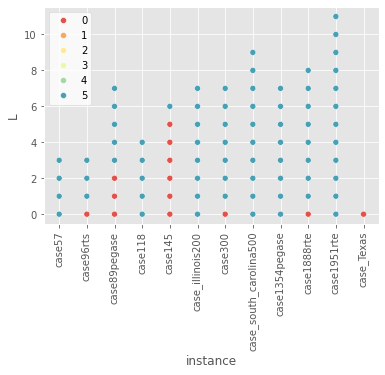

In [14]:
sns.scatterplot(x=brimkov_df.instance, y=brimkov_df.L, 
                hue=brimkov_df.result, hue_order=labels, palette=palette)
plt.xticks(rotation=90)
plt.style.use('ggplot') 
plt.legend(facecolor="white", loc=2)
plt.show()

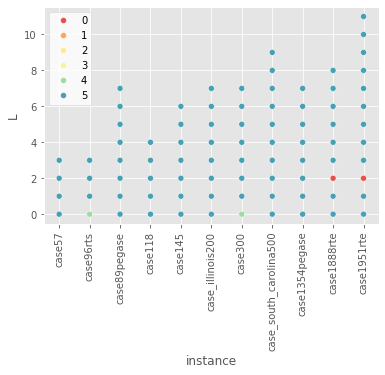

In [15]:
sns.scatterplot(x=cycles_df.instance, y=cycles_df.L, 
                hue=cycles_df.result, hue_order=labels, palette=palette)
plt.xticks(rotation=90)
plt.style.use('ggplot') 
plt.legend(facecolor="white", loc=2)
plt.show()

/tmp/ipykernel_13619/282106934.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=forts_df.instance, y=forts_df.L, hue=forts_df.result, hue_order=labels, palette=palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


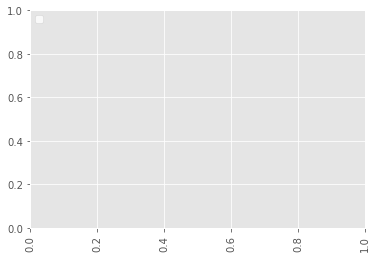

In [19]:
sns.scatterplot(x=forts_df.instance, y=forts_df.L, 
                hue=forts_df.result, hue_order=labels, palette=palette)
plt.xticks(rotation=90)
plt.style.use('ggplot') 
plt.legend(facecolor="white", loc=2)
plt.show()

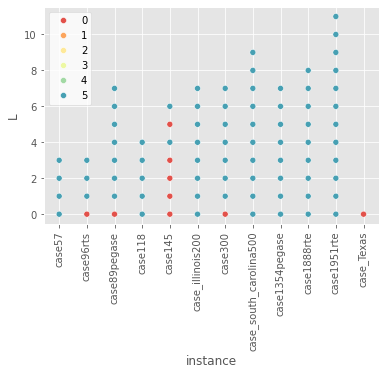

In [18]:
sns.scatterplot(x=jovanovic_df.instance, y=jovanovic_df.L, 
                hue=jovanovic_df.result, hue_order=labels, palette=palette)
plt.xticks(rotation=90)
plt.style.use('ggplot') 
plt.legend(facecolor="white", loc=2)
plt.show()

## Best solver

In [24]:
df3 = brimkov_df.merge(cycles_df, on=["instance","vertices","edges","propagating_vertices","L"],
                       suffixes=["", "_cycles"])
df3 = df3.merge(forts_df, on=["instance","vertices","edges","propagating_vertices","L"],
                suffixes=["", "_forts"])
df3 = df3.merge(jovanovic_df, on=["instance","vertices","edges","propagating_vertices","L"],
                suffixes=["_brimkov", "_jovanovic"])
df3

,instance,vertices,edges,propagating_vertices,solver_brimkov,L,variables_brimkov,constraints_brimkov,result_brimkov,gap_all_brimkov,...,upper_bound_forts,solver_jovanovic,variables_jovanovic,constraints_jovanovic,result_jovanovic,gap_all_jovanovic,gap_feas_jovanovic,time_all_jovanovic,time_opt_jovanovic,upper_bound_jovanovic


In [ ]:
# First criterior: more solved instances
# Second criterion: less time 
# Third criterion: less upper bound
def compare(t1, t2):
    if t1[1] > t2[1]:
        return -1
    elif t1[1] < t2[1]:
        return 1
    if t1[2] < t2[2]:
        return -1
    elif t1[2] > t2[2]:
        return 1
    if t1[3] < t2[3]:
        return -1
    elif t1[3] > t2[3]:
        return 1
    return 0

def get_winner(serie):
    ls = [(serie["solver"+solver], 
           serie["result"+solver], 
           serie["time_opt"+solver], 
           serie["upper_bound"+solver]) 
          for solver in ("_brimkov", "_cycles", "_forts")]
    ls = sorted(ls, key=functools.cmp_to_key(compare))
    return ls[0][0]
    
df3["winner"] = df3.apply(get_winner, axis=1)
df3[["instance", "omega", "winner"]]

In [ ]:
df4 = df3.groupby("winner", as_index=False).agg(number = ("instance","count"))
print(df4)
plt.pie(df4.number, labels=df4.winner, autopct='%1.1f%%')
plt.show()

In [ ]:
sns.scatterplot(x=df3.instance, y=df3.omega, hue=df3.winner)
plt.xticks(rotation=90)
plt.style.use('ggplot') 
plt.legend(facecolor="white")
plt.show()

## Max and best omega

Best omega is the minimum value of omega that minimises the objective value.

In [ ]:
df4 = df.groupby("instance", as_index=False).agg(max_omega = ("omega", "max"))
max_omega = dict(zip(df4.instance, df4.max_omega))
print(max_omega)

In [ ]:
df4 = df.sort_values(["vertices", "instance", "opt_val", "omega"], ignore_index=True).groupby("instance").head(1)
best_omega = dict(zip(df4.instance, df4.omega))
print(best_omega)

## Optimal times

In [ ]:
modelos = df.solver.unique().tolist()

def optimal_times(df: pd.DataFrame, interval: pd.Interval, max_time : int = timeout, log_scale : bool = True):
    # Filter dataframes
    df5 = df[df[["instance","omega"]].apply(
        lambda row: (row.omega-1)/max_omega[row.instance] not in interval, axis=1) == False]
    df5 = df5[["time_opt_"+s for s in modelos]]
    # Replace NaN with Inf
    df5.replace(float("nan"), float("inf"), inplace=True)
    
    # Time instants
    times = range(0, max_time+1)
    # Empty dataframe
    df6 = pd.DataFrame(columns=["instant"]+modelos)
    # Fill dataframe
    df6["instant"] = times
    for modelo in modelos:
        df6[modelo] = times
    df6[modelos] = df6[modelos].apply(lambda row: df5[df5 <= row[modelos[0]]].count() / df5.count(), axis=1)

    # Graph
    for modelo in modelos:
        plt.plot(df6["instant"].values, df6[modelo].values)
        if (log_scale):
            plt.xscale("log")
        plt.xlabel("Time instant (seconds)")
        plt.ylabel("% Solved");
        #plt.xlim(left=step);
        plt.legend([modelo for modelo in modelos]);

In [ ]:
optimal_times(df3, pd.Interval(0, 0.25, closed="both"))

In [ ]:
optimal_times(df3, pd.Interval(0.25, 0.5, closed="right"))

In [ ]:
optimal_times(df3, pd.Interval(0.5, 0.75, closed="right"))

In [ ]:
optimal_times(df3, pd.Interval(0.75, 1, closed="right"))

## Performance profile

In [ ]:
modelos = df.solver.unique().tolist()

def performance_profile(df: pd.DataFrame, interval: pd.Interval, step: float = 0.1, log_scale : bool = True):
    # Restringir dataframes
    df5 = df[df[["instance","omega"]].apply(
        lambda row: (row.omega-1)/max_omega[row.instance] not in interval, axis=1) == False]
    df5 = df5[["time_opt_"+s for s in modelos]]
    # Dividimos cada fila por el mejor tiempo de la fila
    df5 = df5.apply(lambda row: row/row.min(), axis=1)
    # Calculamos el ratio máximo
    rM = ceil(df5.max(axis=None)) + 1
    # Reemplazamos los nan por inf
    df5.replace(float("nan"), float("inf"), inplace=True)
    
    # Vector de ratios
    ratios = np.arange(1, rM, step)
    # Dataframe vacio
    df6 = pd.DataFrame(columns=["ratio"]+modelos)
    # Llenamos el dataframe con los ratios
    df6["ratio"] = ratios
    for modelo in modelos:
        df6[modelo] = ratios
    # Llenamos las demás entradas del dataframe
    df6[modelos] = df6[modelos].apply(lambda row: find_prob(df5, row[modelos[0]]), axis=1)

    # Graficamos
    for modelo in modelos:
        plt.plot(df6["ratio"].values, df6[modelo].values)
        if (log_scale):
            plt.xscale("log")
        plt.xlabel("Ratio to best execution time, r")
        plt.ylabel("Probability of achieving a ratio < r");
        plt.legend([modelo for modelo in modelos]);
    
# Funcion que calcula los ratios
def find_prob(df, r):
    return df[df <= r].count() / df.count()    

In [ ]:
performance_profile(df3, pd.Interval(0, 0.25, closed="both"))

In [ ]:
performance_profile(df3, pd.Interval(0.25, 0.5, closed="right"))

In [ ]:
performance_profile(df3, pd.Interval(0.5, 0.75, closed="right"))

In [ ]:
performance_profile(df3, pd.Interval(0.75, 1, closed="right"))